In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [ ]:
train_df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/mitbih_train.csv", header = None)
test_df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/mitbih_test.csv", header = None)

In [ ]:
train_df[187] = train_df[187].astype(int)
train_df[187].value_counts()

,count
187,
0,72471
4,6431
2,5788
1,2223
3,641


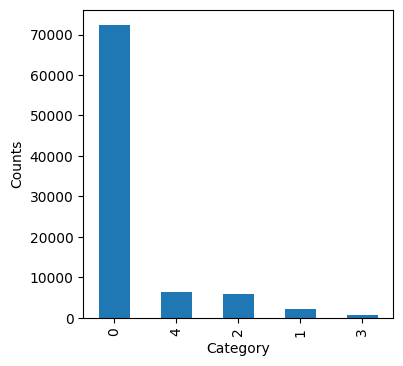

In [ ]:
plt.figure(figsize=(4, 4))
train_df[187].value_counts().plot(kind='bar')
plt.xlabel('Category')
plt.ylabel('Counts')
plt.show()

In [ ]:
from sklearn.metrics import classification_report, f1_score, confusion_matrix
from sklearn.model_selection import train_test_split
#from tensorflow.keras.utils.np_utils import to_categorical
from sklearn.utils import class_weight

from tensorflow.keras.utils import to_categorical

In [ ]:
from sklearn.utils import resample
df_1=train_df[train_df[187]==1]
df_2=train_df[train_df[187]==2]
df_3=train_df[train_df[187]==3]
df_4=train_df[train_df[187]==4]
df_0=(train_df[train_df[187]==0]).sample(n=15000,random_state=42)

df_1_upsample=resample(df_1,replace=True,n_samples=15000,random_state=123)
df_2_upsample=resample(df_2,replace=True,n_samples=15000,random_state=124)
df_3_upsample=resample(df_3,replace=True,n_samples=15000,random_state=125)
df_4_upsample=resample(df_4,replace=True,n_samples=15000,random_state=126)

train_df=pd.concat([df_0,df_1_upsample,df_2_upsample,df_3_upsample,df_4_upsample])

In [ ]:
# #Coverting to binary Classification
# train_df[187] = train_df[187].apply(lambda x: 1 if x != 0 else 0)

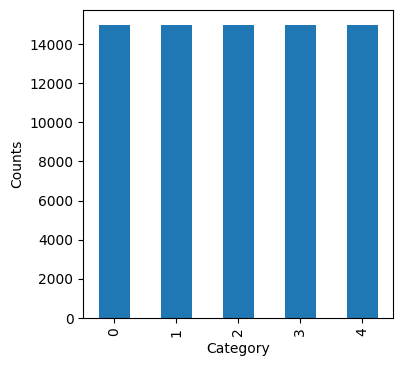

In [ ]:
plt.figure(figsize=(4, 4))
train_df[187].value_counts().plot(kind='bar')
plt.xlabel('Category')
plt.ylabel('Counts')
plt.show()

In [ ]:
target_train=train_df[187]
target_test=test_df[187]
y_train=to_categorical(target_train)
y_test=to_categorical(target_test)

In [ ]:
X_train=train_df.iloc[:,:186].values
X_test=test_df.iloc[:,:186].values
X_train = X_train.reshape(len(X_train), X_train.shape[1],1)
X_test = X_test.reshape(len(X_test), X_test.shape[1],1)

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout, BatchNormalization

model = Sequential()

model.add(Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(186, 1))) #try chaning the activation functions try leaky ReLU
model.add(MaxPooling1D(pool_size=2))
model.add(BatchNormalization())

model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(BatchNormalization())

model.add(Conv1D(filters=128, kernel_size=3, activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(BatchNormalization())

model.add(Flatten())


model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(5, activation='softmax'))


model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                      │ (None, 184, 32)             │             128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d (MaxPooling1D)         │ (None, 92, 32)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 92, 32)              │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_1 (Conv1D)                    │ (None, 90, 64)              │           6,208 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_1 (MaxPooling1D)       │ (None, 45, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 45, 64)              │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_2 (Conv1D)                    │ (None, 43, 128)             │          24,704 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_2 (MaxPooling1D)       │ (None, 21, 128)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 21, 128)             │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 2688)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         344,192 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 5)                   │             645 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 376,773 (1.44 MB)

 Trainable params: 376,325 (1.44 MB)

 Non-trainable params: 448 (1.75 KB)

In [ ]:
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

Epoch 1/10
2344/2344 ━━━━━━━━━━━━━━━━━━━━ 67s 27ms/step - accuracy: 0.8452 - loss: 0.1707 - val_accuracy: 0.8832 - val_loss: 0.1119
Epoch 2/10
2344/2344 ━━━━━━━━━━━━━━━━━━━━ 64s 27ms/step - accuracy: 0.9436 - loss: 0.0657 - val_accuracy: 0.9510 - val_loss: 0.0548
Epoch 3/10
2344/2344 ━━━━━━━━━━━━━━━━━━━━ 63s 27ms/step - accuracy: 0.9609 - loss: 0.0458 - val_accuracy: 0.9198 - val_loss: 0.0871
Epoch 4/10
2344/2344 ━━━━━━━━━━━━━━━━━━━━ 80s 26ms/step - accuracy: 0.9702 - loss: 0.0356 - val_accuracy: 0.9244 - val_loss: 0.0886
Epoch 5/10
2344/2344 ━━━━━━━━━━━━━━━━━━━━ 88s 29ms/step - accuracy: 0.9774 - loss: 0.0284 - val_accuracy: 0.9757 - val_loss: 0.0402
Epoch 6/10
2344/2344 ━━━━━━━━━━━━━━━━━━━━ 76s 26ms/step - accuracy: 0.9794 - loss: 0.0255 - val_accuracy: 0.9650 - val_loss: 0.0490
Epoch 7/10
2344/2344 ━━━━━━━━━━━━━━━━━━━━ 82s 26ms/step - accuracy: 0.9828 - loss: 0.0227 - val_accuracy: 0.9655 - val_loss: 0.0561
Epoch 8/10
2344/2344 ━━━━━━━━━━━━━━━━━━━━ 86s 28ms/step - accuracy: 0.9846 -

In [ ]:
#For Multiclass Classification
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {test_acc}')

685/685 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.9820 - loss: 0.0282
Test Accuracy: 0.9743741750717163


In [ ]:
model.save_weights('arrhythmia_detection_multiclass.weights.h5')

In [ ]:
model.load_weights('/content/drive/MyDrive/Colab Notebooks/arrhythmia_detection_multiclass.weights.h5')